# **Preproccessing**

### Importing Asset

Dalam tahapan ini kita akan melakukan pengimportan terhadap hal hal yang memang diperlukan. Seperti kita akan mengimport library uyang akan dibutuhkan. Dan juga kita akn melakukan import pada datset kita. Selain itu kita akan melihat sedikit tentang isi datasetnya.

In [1]:
# import library
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re
import string
import pandas as pd
import numpy as np
from wordcloud.wordcloud import WordCloud

In [2]:
# mengambil dataset
df = pd.read_csv("dataset\INA_TweetsPPKM_Labeled_Pure.csv", sep="\t")

# menampilkan dataset
df.head()

,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1


**0 = positif, 1 = netral, 2 = negatif**

lalu kita juga akan menelusuri berapa banyak data pada setiap label

In [3]:
# untuk menghitung banyaknya data pada setiap label
df["sentiment"].value_counts()

sentiment
1    17706
2     3980
0     1958
Name: count, dtype: int64

dari pengamatan di atas, kita dapat melihat bahwa tweet yang memiliki label netral jauh lebih banyak yang disusul dengan tweet negatif. Maka langkah yang kita akan ambil nantinya adalah dengan menyeimbangkan lagi untuk banyaknya data pada setiap label

### Feature Selection

dalam tahapan ini kita akan melakukan pengambilan fitur yang dibutuhkan saja. Untuk kasus text mining kita perlu komentarnya dan labelnya saja. Komentar sebagai x dan label sebagai y. Selain itu kita juga akan menyeimbangkan banyaknya data pada setiap label

In [4]:
# unuk menghilangkan kolom yang tidak diperlukan
df.drop(columns=["Date", "User"], inplace=True)

df.head()

,Tweet,sentiment
0,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,Kementerian Agama menerbitkan Surat Edaran Nom...,1


lalu kita akan melakukan pengecilan size. Agar seimbang kita tentukan banyaknya data pada setiap label adalh 1900, mengambil dari nilai terendah pada jenis label. Tujuan dari penyeimbangan data adalah untuk menghindari terjadinya overfitting pada label tertentu (cenderung menebak pada label yang banyak)

In [5]:
# untuk mengambil data 1900 dari masing2 jenis label
df = pd.concat([df[df.sentiment==0][:1900], df[df.sentiment==1][:1900], df[df.sentiment==2][:1900]])\
    .sample(frac=1, random_state=134).reset_index(drop=True)

df


,Tweet,sentiment
0,"Tak Terima Kota Malang Masuk PPKM Level 2, Wal...",1
1,"PPKM Dicabut, Booking Hotel Tetap Nihil https:...",1
2,Inilah Sistem Kerja Baru 2022 Bagi ASN Selama ...,1
3,JKW : Pak LBP nanti umumkan #PPKM #diperpanjan...,2
4,KABAR PANDEMI - Berpergian Sehat Pada Saat Pan...,1
...,...,...
5695,"#PPKM LEVEL 1000 yes , membagongkan",2
5696,"PPKM level 4 diperpanjang, sampai kapan? Nanti...",2
5697,"Mendagri Tito Karnavian mengatakan, PPKM Level...",1
5698,Program gagal kok yaa dilanjutin terus #PPKM #...,2


### Missing Value

Pada tahapan ini kita akan memeriksa apakah data kita terdapat yang kosong atau tidak. Tujuannya adalah untuk menghindari terjadinya error pada saat modeling algoritma

In [6]:
# mencari data kosong jenis Nan
df.isna().sum()

Tweet        0
sentiment    0
dtype: int64

In [7]:
# mencari data kosong jenis Null
df.isnull().sum()

Tweet        0
sentiment    0
dtype: int64

berhubungan tidak ada data yang kosong maka kita bisa langsung lanjut

### Duplicated Data

Selanjutnya kita juga akan melihat apakah ada data yang terduplikasi tujuannya adalah untuk menghindari overfitting. Model akan belajar hal yang sama secara berulang pada data yang terduplikasi sehingga model cenderung menghapal dan lebih mengingat data yang terduplikasi

In [8]:
# untuk menampilkan data yang terduplikasi
df[df.duplicated()]

,Tweet,sentiment
898,#PPKM,2
1258,Pemerintah Siapkan 3 Skenario Antisipasi Lonja...,1
1681,#semangat #ppkm,0
1691,Pemerintah Siapkan 3 Skenario Antisipasi Lonja...,1
1898,#ghostparade #ghostparadecomic #tidaktakuthant...,0
2108,#PPKM,2
2189,Pemerintah klo bikin acara rame2 di bolehin ti...,2
2286,#semangat #ppkm,0
2315,Hasil Pengeluaran BULLSEYE\nHari Ini : Selasa ...,1
2431,Pasti ada yang siap dan nggak siap dengan perp...,2


di atas merupakan beberapa data yang terduplikasi, maka kita perlu menghilangkan saja untuk data yang terduplikasi ini

In [9]:
# untuk menghilangkan data yang terduplikasi
df.drop_duplicates(inplace=True)

# untuk menampilkan data yang terduplikasi
df[df.duplicated]

,Tweet,sentiment


### Train Test Split

dalam tahapan ini kita akan membagi antara data train dengan data test. Tujuannya untuk kita dapat melakukan testing sehingga kita mengetahui performa dari model. Untuk sekarang kita menggunakan test size sebesar 0.2

In [10]:
# fungsi yang akan mengembalikan x, y yang sudah di split
def Train_Test_Split(x, y, test_size=0.2, random_seed=None):
    # banyaknya data
    n = len(x)

    # jika menentukan keacakan yang pasti
    if random_seed:
        np.random.seed(random_seed)

    # menghitung banyaknya datatest 
    test_size = int(test_size*n)

    # mengambil matrix random untuk menjadikan indices
    indices = np.random.permutation(n)
    train_indices, test_indices = indices[test_size:], indices[:test_size]

    # mengembalikan x_train, x_test, y_train, y_test
    return x.iloc[train_indices], x.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

# menentukan x dan y nya
x = df["Tweet"]
y = df["sentiment"]

# melakukan split pada data kita
X_train, X_test, y_train, y_test = Train_Test_Split(x, y, random_seed=42)

# untuk menampilkan X_train
X_train

670     Finally, it's official guys! \nHarus Totalitas...
3509    Hai SohIB! Kapasitas penumpang #KRL Jabodetabe...
4408    Menteri Koordinator Bidang Perekonomian, Airla...
1622    37 kabupaten/kota di luar Jawa-Bali jalankan P...
2592    Ketahui informasi pembagian #PPKM di wilayah J...
                              ...                        
3796    Perpisahan tak membuat segalanya berakhir\nPin...
5227    PTM SD Masih 50 Persen PPKM Banyumas Turun Lev...
5264    Setiap kita yang 'usaha' hari ini sama-sama ke...
5430    Libur Aman dan Nyaman Tanpa Covid\n\nPemerinta...
860     Kasus COVID-19 di luar Jawa dan Bali masih rel...
Name: Tweet, Length: 4527, dtype: object

### Case Folding

Pada tahapan ini kita akan menghapus karater karakter yang tidak diperlukan dan tidak penting seperti tanda baca, hastag, tag, dan lain sebagainya.

In [11]:
# yang akan mengembalikan text yang sudah di casefolding
def case_folding(text):
    # untuk menghilangkan tag
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)

    # untuk menghilangkan hastag
    text = re.sub(r"#\w+", "", text)

    # untuk menghilangkan angka
    text = re.sub(r"\d+", "", text)

    # untuk meghilangkan enter / newline
    text = re.sub(r"\n+", "", text)

    # untuk menghilangkan karakter RT 
    text = re.sub(r"RT[\s]+", "", text)

    # untuk menghilangkan link
    text = re.sub(r"https?://\S+", "", text)

    # untuk menghilangkan tanda baca
    text = text.translate(str.maketrans("", "", string.punctuation))

    # untuk menghilangkan emohji
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U00010000-\U0010ffff"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r"", text)

    return text.lower()
    
    
# mengaplikasikannya untuk setiap dokumen
X_train = X_train.apply(case_folding)
X_train

670     finally its official guys harus totalitas tega...
3509    hai sohib kapasitas penumpang  jabodetabek dan...
4408    menteri koordinator bidang perekonomian airlan...
1622     kabupatenkota di luar jawabali jalankan ppkm ...
2592    ketahui informasi pembagian  di wilayah jabar ...
                              ...                        
3796    perpisahan tak membuat segalanya berakhirpintu...
5227    ptm sd masih  persen ppkm banyumas turun level...
5264    setiap kita yang usaha hari ini samasama kesus...
5430    libur aman dan nyaman tanpa covidpemerintah te...
860     kasus covid di luar jawa dan bali masih relati...
Name: Tweet, Length: 4527, dtype: object

mari kita cek untuk hasilnya

In [12]:
# sebelum di case folding
df.Tweet.loc[2160]

'Katanya #ppkm diperpanjang? Sampe berapa meter panjangnya tuh?? 🙄😏'

In [13]:
# setelah di case folding
X_train.loc[2160]

'katanya  diperpanjang sampe berapa meter panjangnya tuh '

### Tokenize

Pada tahapan ini kita akan melakuan pisahkn dokumen menjadi perkata. Hal ini difungsikan agar kita dapat menghitung bobot kata. Kata inila yang akan digunakan sebgai feature nantinya.

In [14]:
# melakukan pemisahan menjadi kata
def tokenize(text):
    return word_tokenize(text)

# mengimentasikan untuk setiap item
X_train  = X_train.apply(tokenize)
X_train

670     [finally, its, official, guys, harus, totalita...
3509    [hai, sohib, kapasitas, penumpang, jabodetabek...
4408    [menteri, koordinator, bidang, perekonomian, a...
1622    [kabupatenkota, di, luar, jawabali, jalankan, ...
2592    [ketahui, informasi, pembagian, di, wilayah, j...
                              ...                        
3796    [perpisahan, tak, membuat, segalanya, berakhir...
5227    [ptm, sd, masih, persen, ppkm, banyumas, turun...
5264    [setiap, kita, yang, usaha, hari, ini, samasam...
5430    [libur, aman, dan, nyaman, tanpa, covidpemerin...
860     [kasus, covid, di, luar, jawa, dan, bali, masi...
Name: Tweet, Length: 4527, dtype: object

### Stopwords

Tahapan stopwords adalah dimana kita membuang kata yang tidak begitu penting dan tidak bermakna secara independent. Karena sudah dipishkan menjadi perkata makan makna dai setiap kata haruslah independent. Misal kata hubung, kata sifat, dan lain lain 

In [15]:
# untuk mengambil kata yang tak bermakna
stopw = StopWordRemoverFactory().get_stop_words()

# fungsi yang menghilangkan stopword
def stopword(doc):
    return [text for text in doc if text not in stopw]

# mengimplementasikan pada setiap dokumen
X_train = X_train.apply(stopword)
X_train

670     [finally, its, official, guys, totalitas, tega...
3509    [hai, sohib, kapasitas, penumpang, jabodetabek...
4408    [menteri, koordinator, bidang, perekonomian, a...
1622    [kabupatenkota, luar, jawabali, jalankan, ppkm...
2592    [ketahui, informasi, pembagian, wilayah, jabar...
                              ...                        
3796    [perpisahan, tak, membuat, segalanya, berakhir...
5227      [ptm, sd, persen, ppkm, banyumas, turun, level]
5264    [usaha, hari, samasama, kesusahan, usaha, mend...
5430    [libur, aman, nyaman, covidpemerintah, menetap...
860     [kasus, covid, luar, jawa, bali, relatif, rend...
Name: Tweet, Length: 4527, dtype: object

### Stemming

Dalam tahapan ini kita akan mengubah kata yang memiliki imbuhan seperti -nya / me- / pe- menjadi kata aslinya (tanpa imbuhan). Hal ini difungsikan agar kata dalam setiap dokumen memiliki makna yang sama

In [16]:
# fungsi yang akan mengembalikan kata yang sudah di stem
stem = StemmerFactory().create_stemmer()
 
# fungsi yang akan mengembalikan dokumen yang sudah di stem
def stemming(doc):
    return [stem.stem(text) for text in doc]

# mengaplikasikan di setiap dokumen
X_train = X_train.apply(stemming)
# untuk berjaga jaga, kita mengcopynya
X_traincopy = X_train.copy()

dikarenakan prosesnya cukup lama maka kita perlu menynimpannya terlebih dahulu

In [17]:
# untuk disimpan terlebih dahulu
X_train.to_csv("stem2.csv", index=False)

X_train



670     [finally, its, official, guys, totalitas, tega...
3509    [hai, sohib, kapasitas, tumpang, jabodetabek, ...
4408    [menteri, koordinator, bidang, ekonomi, airlan...
1622    [kabupatenkota, luar, jawabali, jalan, ppkm, l...
2592    [tahu, informasi, bagi, wilayah, jabar, dasar,...
                              ...                        
3796    [pisah, tak, buat, segala, berakhirpintupintu,...
5227      [ptm, sd, persen, ppkm, banyumas, turun, level]
5264    [usaha, hari, samasama, susah, usaha, diskon, ...
5430    [libur, aman, nyaman, covidpemerintah, tetap, ...
860     [kasus, covid, luar, jawa, bal, relatif, renda...
Name: Tweet, Length: 4527, dtype: object

In [18]:
# mengupdate / memanggil ulang
X_train = pd.read_csv("stem2.csv")["Tweet"].apply(lambda x: x.replace("'", "").strip("][").split(", "))

X_train

0       [finally, its, official, guys, totalitas, tega...
1       [hai, sohib, kapasitas, tumpang, jabodetabek, ...
2       [menteri, koordinator, bidang, ekonomi, airlan...
3       [kabupatenkota, luar, jawabali, jalan, ppkm, l...
4       [tahu, informasi, bagi, wilayah, jabar, dasar,...
                              ...                        
4522    [pisah, tak, buat, segala, berakhirpintupintu,...
4523      [ptm, sd, persen, ppkm, banyumas, turun, level]
4524    [usaha, hari, samasama, susah, usaha, diskon, ...
4525    [libur, aman, nyaman, covidpemerintah, tetap, ...
4526    [kasus, covid, luar, jawa, bal, relatif, renda...
Name: Tweet, Length: 4527, dtype: object

# **Pembobotan Kata**

### Analize Frequency Word

dalam tahapan ini kiyta akan menganalisa, kata apa yang paling sering muncul. Dengann  hal itu, kita mampu menentukan threshold nantinya.

tetapi sebelum menampilkan wordcloud, kita perlu menambahkan kita perlu melabeli terlebih dahulu data kita

In [19]:
# mengcopy data train
labeled_data = X_train.to_frame()

# melabeli data
labeled_data["Labels"] = y_train

# menampilkan data
labeled_data.head()

,Tweet,Labels
0,"[finally, its, official, guys, totalitas, tega...",1.0
1,"[hai, sohib, kapasitas, tumpang, jabodetabek, ...",1.0
2,"[menteri, koordinator, bidang, ekonomi, airlan...",1.0
3,"[kabupatenkota, luar, jawabali, jalan, ppkm, l...",2.0
4,"[tahu, informasi, bagi, wilayah, jabar, dasar,...",1.0


hasil dari kata yang sering muncul pada dokumen yang terlabeli positif

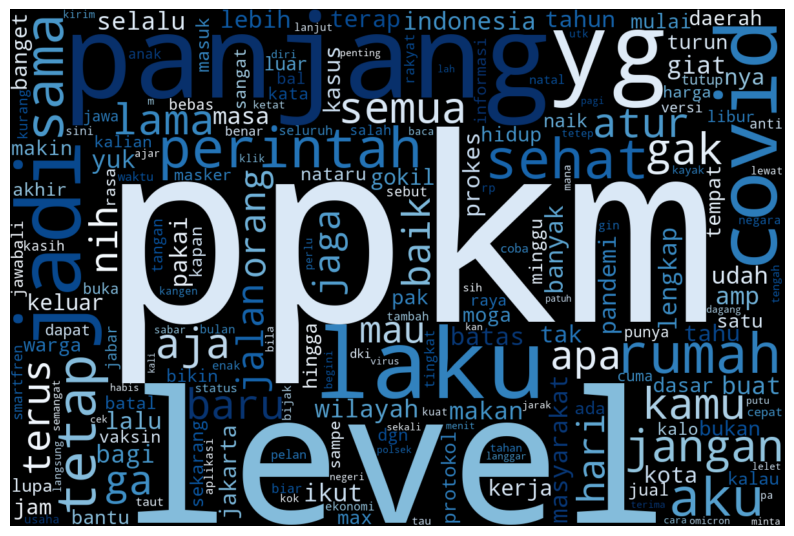

In [20]:
# untuk menampilkan wordcloud
def show_wc(wordcloud):
    plt.figure(figsize=(10, 8)) 
    plt.axis("off")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

# mengambil semua kata yang ada dalam dokumen terlabeli positif
allwords = "".join([str(word).replace("'", "") for word in labeled_data.Tweet[labeled_data.Labels == 0]])

# menyiapkan wordcloudnya
word_cloud = WordCloud(
    width=1200, # lebar
    height=800, # tinggi
    random_state=123, # keacakan pati
    colormap="Blues_r",
    collocations=False
).generate(allwords)
    
# memanggil fingsi untuk memunculkan
show_wc(word_cloud)

hasil dari kata yang sering muncul pada dokumen yang terlabeli negatif

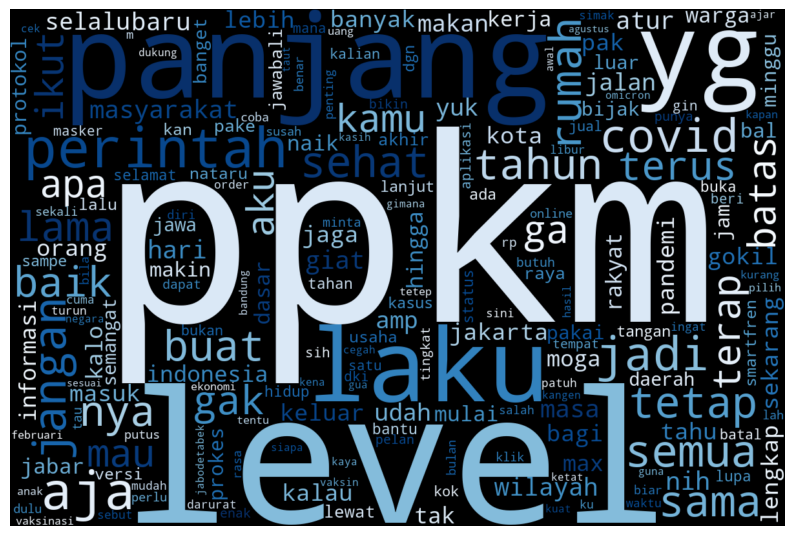

In [21]:
# untuk menampilkan wordcloud
def show_wc(wordcloud):
    plt.figure(figsize=(10, 8)) 
    plt.axis("off")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

# mengambil semua kata yang ada dalam dokumen terlabeli negatif
allwords = "".join([str(word).replace("'", "") for word in labeled_data.Tweet[labeled_data.Labels == 2]])

# menyiapkan wordcloudnya
word_cloud = WordCloud(
    width=1200, # lebar
    height=800, # tinggi
    random_state=123, # keacakan pati
    colormap="Blues_r",
    collocations=False
).generate(allwords)
    
# memanggil fingsi untuk memunculkan
show_wc(word_cloud)

hasil dari kata yang sering muncul pada dokumen yang terlabeli netral

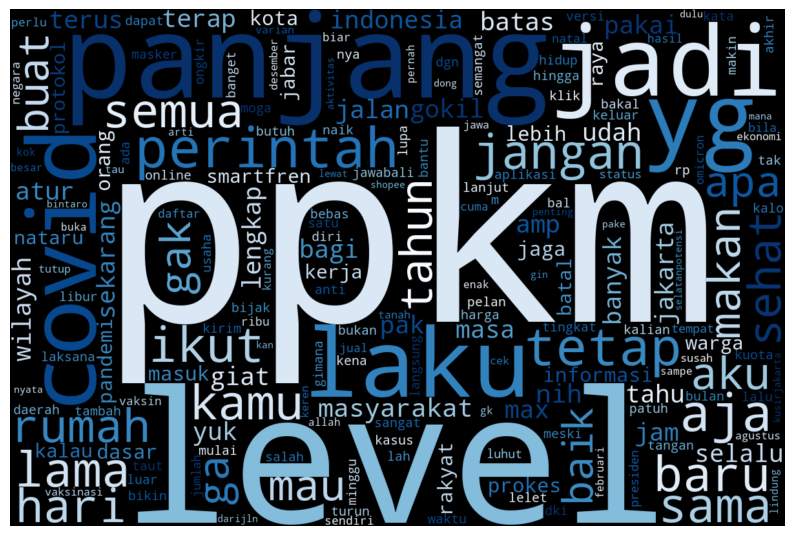

In [22]:
# untuk menampilkan wordcloud
def show_wc(wordcloud):
    plt.figure(figsize=(10, 8)) 
    plt.axis("off")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

# mengambil semua kata yang ada dalam dokumen terlabeli netral
allwords = "".join([str(word).replace("'", "") for word in labeled_data.Tweet[labeled_data.Labels == 1]])

# menyiapkan wordcloudnya
word_cloud = WordCloud(
    width=1200, # lebar
    height=800, # tinggi
    random_state=123, # keacakan pati
    colormap="Blues_r",
    collocations=False
).generate(allwords)
    
# memanggil fingsi untuk memunculkan
show_wc(word_cloud)

### Documents Frequency

dalam tahapan ini kita akan mencari kata yang akan menjadi fitur / term nantinya. selain itu kita juga akan menghitung dari df atau banyaknya dokumen yang berisi term tertentu

In [23]:
# untuk menyimpan semua kata  / term
word_set = []

# mencari term dalam dokumen
for doc in X_train:
    for word in doc:
        if word not in word_set:
            word_set.append(word)

# banyaknya dokumen
n_documents = len(X_train)

# untuk menyimpan index berdasarkan word /term nya
index_dict = {}
for i, word in enumerate(word_set):
    index_dict[word] = i

word_set

['finally',
 'its',
 'official',
 'guys',
 'totalitas',
 'tegas',
 'amp',
 'ga',
 'tengah',
 'eksekusi',
 'nya',
 'yuk',
 'indonesia',
 'hai',
 'sohib',
 'kapasitas',
 'tumpang',
 'jabodetabek',
 'yogya',
 'solo',
 'tingkat',
 'level',
 'tetap',
 'waspada',
 'patuh',
 'atur',
 'menteri',
 'koordinator',
 'bidang',
 'ekonomi',
 'airlangga',
 'hartarto',
 'bijak',
 'laku',
 'batas',
 'giat',
 'masyarakat',
 'ppkm',
 'luar',
 'jawabali',
 'lanjut',
 'hingga',
 'tanggal',
 'januari',
 'datang',
 'kabupatenkota',
 'jalan',
 'tigaselengkapnya',
 'tahu',
 'informasi',
 'bagi',
 'wilayah',
 'jabar',
 'dasar',
 'lah',
 'gitu',
 'minta',
 'ongkoss',
 'ayo',
 'nabung',
 'zmt',
 'zipmex',
 'emas',
 'buru',
 'beli',
 'simpen',
 'sekarang',
 'investasi',
 'mana',
 'kapan',
 'halo',
 'teman',
 'pintarmengakhiri',
 'pekan',
 'mimin',
 'mau',
 'ajak',
 'pintar',
 'semua',
 'main',
 'zona',
 'fisikananti',
 'ketemu',
 'stay',
 'safe',
 'hari',
 'km',
 'dirmh',
 'kamu',
 'mnjdi',
 'pahlawan',
 'guna',
 '

setelah itu kita akan menghitung Document frequency yaitu menghitung banyaknya dokumen yang berisi term x nanti akan digunakan dalam perhitungan idf.

In [24]:
# untuk menghitung banyaknya document yang di dalamnya ada term x
def count_dict(docs):
    count_word = {} # menghasilkan dictionary
    for term  in word_set:
        count_word[term] = 0
        for doc in docs:
            # jika di dalam dokumen ada term
            if term in doc:
                count_word[term] += 1

    return count_word

# menaruh pada variable count word
count_word = count_dict(X_train)
count_word

{'finally': 1,
 'its': 5,
 'official': 6,
 'guys': 23,
 'totalitas': 1,
 'tegas': 15,
 'amp': 128,
 'ga': 177,
 'tengah': 40,
 'eksekusi': 2,
 'nya': 123,
 'yuk': 151,
 'indonesia': 153,
 'hai': 41,
 'sohib': 15,
 'kapasitas': 19,
 'tumpang': 11,
 'jabodetabek': 47,
 'yogya': 3,
 'solo': 4,
 'tingkat': 80,
 'level': 845,
 'tetap': 244,
 'waspada': 25,
 'patuh': 71,
 'atur': 186,
 'menteri': 38,
 'koordinator': 16,
 'bidang': 15,
 'ekonomi': 57,
 'airlangga': 15,
 'hartarto': 6,
 'bijak': 91,
 'laku': 362,
 'batas': 185,
 'giat': 188,
 'masyarakat': 194,
 'ppkm': 1440,
 'luar': 104,
 'jawabali': 105,
 'lanjut': 68,
 'hingga': 104,
 'tanggal': 37,
 'januari': 50,
 'datang': 35,
 'kabupatenkota': 15,
 'jalan': 169,
 'tigaselengkapnya': 1,
 'tahu': 143,
 'informasi': 118,
 'bagi': 159,
 'wilayah': 182,
 'jabar': 107,
 'dasar': 125,
 'lah': 57,
 'gitu': 31,
 'minta': 55,
 'ongkoss': 1,
 'ayo': 37,
 'nabung': 4,
 'zmt': 1,
 'zipmex': 2,
 'emas': 4,
 'buru': 13,
 'beli': 34,
 'simpen': 1,
 's

### Term Frequency

dalam tahapan ini kita akan menghitung tf. TF adalah perhitungan banyaknya kata / term yang muncul dari banyaknya kata dalam dokumen tersebut. TF ini nanti akan difungsikan dalam menyiapkan perhitungan pembobotan kata

In [25]:
# akan mengembalikan nilai tf
def term_frequency(word, document):
    # banaknya kata dalam dokumen
    n = len(document)

    # banyaknya kata "word" dalam dokumen "document"
    occurate = document.count(word)

    return occurate / n

### Inverse Document Frequency

dalam tahapan ini kita akan menghitung Inverse document Frequently, yaitu menghitung banyaknya documen yang didalamnya ada kata tertentu 

In [26]:
# fungsi yang mengembalikan nilai idf
def inverse_doc_fre(word):
    try:
        # banyaknya dokumen yang ada kata *word
        document_fre = count_word[word] + 1
    except:
        # jika tidak ada, maka akan tetap dihitung 1 untuk menghindari error
        document_fre = 1

    return np.log(n_documents/document_fre)

### TF - IDF

setelah itu kita akan melakukan perhitungan untuk tf idf, tf  idf adalah gabungan dari tf dan idf. uuntuk rumusnya adalah tf * idf. tf idf inilah yang akan menjadi value dari pembobotan kata

In [27]:
# akan mengembalikan matrix tf-idf
def tf_idf(documents):
    # menyiapkan matrix
    matriks_tfidf = []

    # menghitung untuk setiap item
    for doc in documents:
        # menyiapkan vector untuk setiap item
        tfidf_vector = np.zeros((len(word_set), ))

        # menghitung tfidf untuk setiap item
        for word in doc:
            # hitung tf dan idf
            tf = term_frequency(word, doc)
            idf = inverse_doc_fre(word)

            tfidf = tf * idf
            # menambahkan pada vector sesuai dengan urutan term
            tfidf_vector[index_dict[word]] = tfidf

        # menambahkan vector pada matriks   
        matriks_tfidf.append(tfidf_vector)
    return np.array(matriks_tfidf)


In [28]:
# mengimplementasikan pada x train
tfidf = tf_idf(X_train)

# mengimplementasikan pada dataframe
data  =  pd.DataFrame(tfidf, columns=word_set)
data

,finally,its,official,guys,totalitas,tegas,amp,ga,tengah,eksekusi,...,balikmanejer,manappkm,diperpanjangtenangada,iniyukkksemangattkita,ooh,mohammad,idris,jajal,menitwah,covidpemerintah
0,0.594205,0.509697,0.497839,0.403059,0.594205,0.434248,0.273692,0.248925,0.361865,0.563016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.282261,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.643722


### Feature Selection

dalam tahapan ini, kita akan menyeleksi fitur lagi. fitur yang tidak sesuai maka akan dihapus. Syarat dari suatu fitur adalah harus kata yang tidak muncul di semmua dokumen (karena tidak ada polanya) dan juga tidak boleh terlalu jarang muncul dalam dpokumne juga (karena tidak memiliki pola jika seperti ini). Hal yang tidak memikliki pola akan sulit dikenali untuk model machine learning

mari kita coba lihat untuk setiapp nilai rata rata tf idf setiap term

In [29]:
# mengecek kolom, tfidf, df
for col in data.columns:
    print(col, data[col].mean(), count_word[col])

finally 0.0001312580511270159 1
its 0.00034313252580998004 5
official 0.0004617209252222545 6
guys 0.001675277184272481 23
totalitas 0.0001312580511270159 1
tegas 0.0012634210021434005 15
amp 0.0057232467346278095 128
ga 0.010486884957381485 177
tengah 0.002726114041427725 40
eksekusi 0.00030401155100336763 2
nya 0.007583136328543689 123
yuk 0.007167081332264668 151
indonesia 0.011648146420692894 153
hai 0.0028199552926113573 41
sohib 0.0014236223342733035 15
kapasitas 0.0017392169303812558 19
tumpang 0.001274210141044687 11
jabodetabek 0.00521384691217797 47
yogya 0.0004301281777835185 3
solo 0.0004574949561721835 4
tingkat 0.005737958097201945 80
level 0.033966464907164075 845
tetap 0.012309993520833248 244
waspada 0.00206035669237019 25
patuh 0.0049432415159387086 71
atur 0.011293372638609779 186
menteri 0.002445524802101689 38
koordinator 0.001164233032865297 16
bidang 0.0009426416587011466 15
ekonomi 0.004428310705174435 57
airlangga 0.0016780801567644935 15
hartarto 0.00055278290

begal 4.87529904186059e-05 1
ksp 0.00034090606298354615 3
uud 4.87529904186059e-05 1
amandemen 4.87529904186059e-05 1
ibu 0.0021858967104731244 25
pak 0.010735873607631955 106
nataru 0.00759197595606879 103
ikut 0.010224423346860394 183
situasi 0.002077266190144873 25
sesuai 0.003096514551064332 43
daerah 0.007744740231180113 105
tri 0.0008189487423013573 4
tunjang 0.00032722623048947745 3
bpk 0.00020527141033437846 3
cukup 0.0025900857048102594 47
kan 0.005257262848723199 60
pilpres 5.6878488821706894e-05 1
meski 0.003916444673415273 53
rasa 0.005013301564786298 63
kaya 0.0033282847599873985 40
adem 0.00023612395618222612 3
panas 0.0008929528336544128 8
kepala 0.0006263890788699675 7
pusing 0.0012008276902131523 13
nafas 0.00043507094231054185 4
tersengalperut 5.6878488821706894e-05 1
hilang 0.0029490540110068395 33
ntah 0.00010604743106114538 2
resmi 0.002583469290484844 28
jawabadi 7.418933324570464e-05 1
inmendagri 0.0024088923759915224 24
ibadah 0.0016872894478429839 18
ada 0.0050

lalu kita mengecek untuk nilai yang dibawah 10 hasil tfidf nya berapa

In [30]:
under_ten = []
# mengecek kolom, tfidf, df
for col in data.columns:
    # jika banyak df dibawah sam dengan 3
    if count_word[col] <= 3:
        print(col, data[col].mean(), count_word[col])
        under_ten.append(data[col].mean())

np.mean(under_ten)

finally 0.0001312580511270159 1
totalitas 0.0001312580511270159 1
eksekusi 0.00030401155100336763 2
yogya 0.0004301281777835185 3
tigaselengkapnya 0.00024376495209302954 1
ongkoss 0.00042658866616280167 1
zmt 0.00024376495209302954 1
zipmex 0.0003160639569898306 2
simpen 0.00012188247604651477 1
pintarmengakhiri 9.479748136951148e-05 1
pintar 9.479748136951148e-05 1
fisikananti 9.479748136951148e-05 1
dirmh 0.0001706354664651207 1
mnjdi 0.0001706354664651207 1
nusa 0.0001706354664651207 1
albert 0.00044008484856554437 3
informatifsemua 0.00032335774061267283 2
nantipas 0.00010664716654070042 1
jkw 0.00020883520747901787 2
joe 0.00010664716654070042 1
bidenjkw 0.00010664716654070042 1
bilangcukup 0.00010664716654070042 1
teruuuuuuuuuusssssssssssss 0.00010664716654070042 1
purwokerto 0.0005543275553360105 2
tempe 0.00024376495209302954 1
accordance 5.0186901901506085e-05 1
affairs 5.0186901901506085e-05 1
ministry 5.0186901901506085e-05 1
instruction 5.0186901901506085e-05 1
number 0.000

led 6.562902556350795e-05 1
strip 6.562902556350795e-05 1
mirip 6.562902556350795e-05 1
bobobox 6.562902556350795e-05 1
kesan 0.00033587169438034 3
komunitas 0.0002684759212449827 3
third 0.00024376495209302954 1
wave 0.0005004345985672318 2
akhlak 0.00010037380380301217 1
dakwah 0.000519349812184434 3
utbar 0.00020883520747901787 2
republika 0.00021329433308140083 1
temensodarakeluargaehh 0.0001421962220542672 1
gataunya 0.0001421962220542672 1
manjang 0.0001421962220542672 1
degan 0.0009034995693589388 2
hc 0.0008531773323256033 1
merdekahari 6.0941238023257386e-05 1
yes 0.000635349386416475 3
eiitss 6.0941238023257386e-05 1
postcard 6.0941238023257386e-05 1
special 0.0004499466939115508 3
edisi 0.0012204033615683162 3
serbu 6.0941238023257386e-05 1
kelaparanppkm 0.0005687848882170688 1
phkppkm 0.0005687848882170688 1
maaakkmembangkongkan 0.0002843924441085344 1
kontl 0.0002843924441085344 1
melar 0.0005362378406891086 3
nungguin 0.0007237054194664583 2
senayan 0.0001812763091313469 

0.00017091440406095726

untuk hasil rata rata nilai tfidf yang dibawah 10 ini akan menjadi acuan nilai threshold

In [31]:
# minimum value untuk term tfidf
threshold = 0.00017091440406095726

# menyimpan term yang akan dibuangg
nonsense_word = []

# mencari kata yang tidak sense berdasarkan threshold
for col in data.columns:
    if data[col].mean() <= threshold:
        nonsense_word.append(col)

nonsense_word

['finally',
 'totalitas',
 'simpen',
 'pintarmengakhiri',
 'pintar',
 'fisikananti',
 'dirmh',
 'mnjdi',
 'nusa',
 'nantipas',
 'joe',
 'bidenjkw',
 'bilangcukup',
 'teruuuuuuuuuusssssssssssss',
 'accordance',
 'affairs',
 'ministry',
 'instruction',
 'number',
 'indonesian',
 'raised',
 'ahead',
 'yearend',
 'holiday',
 'regulation',
 'takes',
 'weeks',
 'until',
 'further',
 'announcement',
 'made',
 'versikuu',
 'kitaa',
 'kontenkoneksi',
 'internetny',
 'ketidakterlaksanaan',
 'proker',
 'kknku',
 'donglomba',
 'napas',
 'semang',
 'cium',
 'tawa',
 'rakabuming',
 'raka',
 'seburukburuk',
 'capa',
 'usahalalui',
 'mataora',
 'et',
 'labora',
 'bekerjasemoga',
 'hampers',
 'rbbox',
 'rumahpengiriman',
 'des',
 'zkawan',
 'hopeful',
 'tersontaque',
 'taglinenya',
 'entar',
 'apanyuruh',
 'turuh',
 'gadisgadis',
 'kadin',
 'arsjad',
 'rasjid',
 'walkmursito',
 'bbm',
 'begal',
 'uud',
 'amandemen',
 'pilpres',
 'tersengalperut',
 'ntah',
 'jawabadi',
 'jemaah',
 'diterapkanselengkapny

setelah itu kita akan mengaplikasikan pendeletan tersebut pada data kita

In [32]:
# melakukan penghapusan term
data.drop(columns=nonsense_word, inplace=True)

data.head()

,its,official,guys,tegas,amp,ga,tengah,eksekusi,nya,yuk,...,opini,nyerang,terkuraskapan,games,dingiinn,rekor,offer,immendagri,ngelawaknya,ooh
0,0.509697,0.497839,0.403059,0.434248,0.273692,0.248925,0.361865,0.563016,0.276733,0.261072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.282261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Modeling**

### Create Class 

dalam tahapan ini kita akan membuat class yanga akan mencakup semua kebutuhan algoritma traning dan testing. Tujuan pembuatan classs ini ditujukan karena dengan adanya class kita dapat melakukan tuning parameter

In [33]:
class KNN:
    # constructor untuk dapat melakukan tunning
    def __init__(self, n_neighbors=3, weight="uniform"):
        self.n_neighbors = n_neighbors # jumlah k
        self.weight = weight # penggunaan bobot
        self.x = None # data train yang x
        self.y = None  # data train yang y

    # digunakan untuk training
    def fit(self, x, y):
        # jika ukuran x dan ukuran y tidak sama maka akan terjadi error
        if len(x) != len(y):
            raise IndentationError("sizeof x different with sizeof y")

        # data training digunakan untuk kebutuhan predict
        self.x = np.array(x)
        self.y = np.array(y)

    # untuk melakukan prediksi dengan algoritma knn
    def predict(self, x):
        # memastikan bahwa itu array
        x = np.array(x)

        # menghitung jarak antara x_predict dengan x yang sudah di train
        distance = [np.sqrt(np.sum((x - x1)**2)) for x1 in self.x]

        # mmencari jarak terdekat
        nearest = np.argsort(distance)[:self.n_neighbors]

        # melabeli yang jaraknya terdekat
        labels = [self.y[i] for i in nearest]
        # print(labels)

        # jika tanpa penggunaan bobot
        if self.weight == "uniform":
            return np.bincount(labels).argmax()

        # jika menggunakan bobot jarak terdekat
        if self.weight == "distance":
            # menghitung bobot berdasarkan jaranya
            weight = [(1 / (distance[i] + 1e-10)) for i in nearest]
            return np.bincount(labels, weight).argmax()
        # jika argumen bobot diisi dengan lainnya
        raise ValueError("can only set weight by 'uniform' or 'distance'")
    
    # untuk menghitung akurasi dari model
    def accuracy(self, y_true, y_predict):
        n = len(y_true) # banyaknya dat
        counter = 0 # jumlah benar

        # menghitung jumlah yang benar
        for i in range(n):
            if y_true[i] == y_predict[i]:
                counter += 1
                
        return counter / n

    def DPredict(self, x_inp):
        # membuatnya menjadi global variable
        global new_sentences, word_set, n_documents, index_dict, tfidf, count_word

        # banyaknya data yang diinputkan
        n_input = len(x_inp)

        # preprocessing
        x_inp = [case_folding(doc) for doc in x_inp] # case folding
        x_inp = [tokenize(doc) for doc in x_inp] # tokenize
        x_inp = [stopword(doc) for doc in x_inp] # stopwords
        x_inp = [stemming(doc) for doc in x_inp] # stemming

        # membuat senteces baru yang berisi x_train + input
        new_sentences = list(X_train)
        for doc in x_inp:
            new_sentences.append(doc)
        
        # untuk menyimpan semua kata  / term
        word_set = []

        # mencari term dalam dokumen
        for doc in new_sentences:
            for word in doc:
                if word not in word_set:
                    word_set.append(word)

        # banyaknya dokumen
        n_documents = len(new_sentences)

        # untuk menyimpan index berdasarkan word /term nya
        index_dict = {}
        for i, word in enumerate(word_set):
            index_dict[word] = i

        # menghitung df
        count_word = count_dict(new_sentences)

        # menghitung tf idf
        tfidf = tf_idf(new_sentences)

        # menentukan tf idf
        train = np.array(tfidf[:-(n_input)])
        test = np.array([tfidf[-(n_input):]])

        # untuk hasil semua prediksi
        predicts = []

        self.x = train

        # menlakukan prediksi untuk setiap input
        for i, x in enumerate(test[0]):
            print("iteration :", (i+1), "/", len(test[0]))
            # print(x)
            predicts.append(self.predict(x))

        return predicts
        
        
        

### Training

dalam tahapn ini kita akan melakukan training pada model kita berdasarkan dataset yang dikhususkan untuk train. 

In [136]:
# menyimpan dalam object
model = KNN(n_neighbors=5, weight="distance")

# melakukan training
model.fit(data, y_train)

### Testing

dalam tahapan ini kiat akan melakukan testein yang tujuannya adalah untuk mengetahui performa dari model kita. Sehingga dengan hal itu kita dalapat melakukan evaluasi dengan tuning parameter atau evaluasi lainnya.

In [137]:
# melakukan prediksi
predicts = model.DPredict(X_test[:30])

iteration : 1 / 30
iteration : 2 / 30
iteration : 3 / 30
iteration : 4 / 30
iteration : 5 / 30
iteration : 6 / 30
iteration : 7 / 30
iteration : 8 / 30
iteration : 9 / 30
iteration : 10 / 30
iteration : 11 / 30
iteration : 12 / 30
iteration : 13 / 30
iteration : 14 / 30
iteration : 15 / 30
iteration : 16 / 30
iteration : 17 / 30
iteration : 18 / 30
iteration : 19 / 30
iteration : 20 / 30
iteration : 21 / 30
iteration : 22 / 30
iteration : 23 / 30
iteration : 24 / 30
iteration : 25 / 30
iteration : 26 / 30
iteration : 27 / 30
iteration : 28 / 30
iteration : 29 / 30
iteration : 30 / 30


In [138]:
model.predict(tfidf[2]), y_train.iloc[2]

(1, 1)

In [139]:
y_train.to_numpy()

array([0, 1, 1, ..., 2, 1, 1], dtype=int64)

In [140]:
predicts

[1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1]

In [141]:
# untuk mengetahui hasil akurasinya
model.accuracy(y_test[:30].to_numpy(), predicts)

0.5333333333333333

In [142]:
for i in range(30):
    print(y_test.iloc[i], predicts[i])

1 1
0 0
0 0
2 1
1 1
1 1
0 1
2 2
2 1
2 0
0 1
2 1
0 2
2 2
2 0
1 1
0 1
1 1
1 1
2 1
1 1
0 1
1 1
1 1
1 1
0 1
0 0
1 1
0 1
0 1


### Conclusion

berikut melalui hasil tuning parameter
jumlah k
- k = 3 => 0.5
- k = 5 => 0.5 
- k = 7 => 0.4666666666666667
- k = 9 => 0.4666666666666667

bobot
- tanpa bobot, k = 3 => 0.5
- dengan bobot, k = 3 => 0.5333333333333333
- tanpa bobot, k = 5 => 0.5
- dengan bobot, k = 5 => 0.5333333333333333